<a href="https://colab.research.google.com/github/abdonmorales/UTSA-PythonBootCamp/blob/main/CAMEE_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Coding
This will cover using Matplotlib, Data Analysis methods, and Data Pre-Processing. At the end you will apply some of these methods to a Nasa public dataset. 

In [ ]:
import numpy as np

# Basics of Matplotlib
Matplotlib provides Python with advanced plotting capabilities, allowing for static, animated, and interactive figures. This section will provide some examples of different types of plots that can be created using Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

## Creating a Figure
Creating a figure in Matplotlib requires only a single line, which creates the Figure object and any Axes objects that will be needed. 

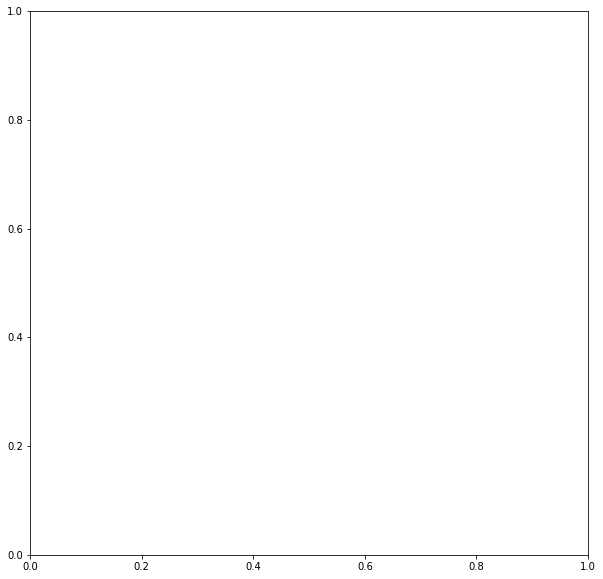

In [ ]:
fig, ax = plt.subplots(1,figsize = (10,10))
plt.show()

You can create create multiple subplots using the same command.

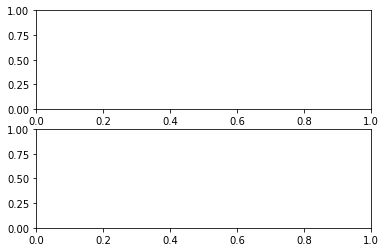

In [ ]:
fig, (ax1,ax2) = plt.subplots(2)
plt.show()

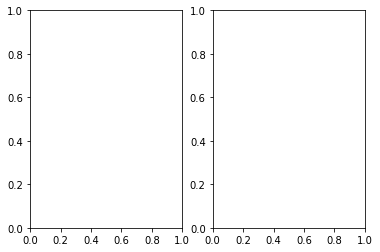

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
plt.show()

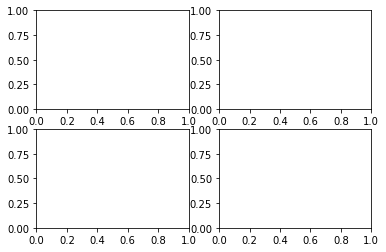

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.show()

These are all basic figures, they do not show any information, have labels, or provide any other information about the system. These traits can be added just as easily through the use of functions in both the Figure and Axes objects. Some examples are shown below:

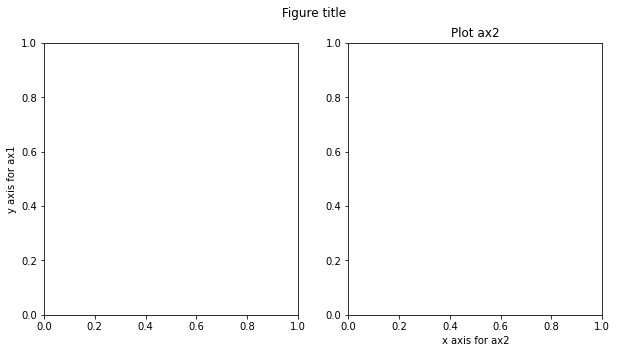

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

ax1.set_ylabel("y axis for ax1")
ax2.set_xlabel("x axis for ax2")
ax2.set_title("Plot ax2")

fig.suptitle("Figure title")
plt.show()

## Plotting Data
As discussed in the lecture, there is a wide range of potential plots that can be used with the previously created figures. This section will cover some different examples and how they can be best used.

### Line Plots
Line plots one of the most basic plots that can be implemented. They can be used to visualize trends in a dataset. An example of a line plot is shown below.

In [ ]:
x_exp = lambda x: np.power(x,2) # This is called a lambda function, think of it as a single line function

x = np.arange(10)
y = x_exp(x)

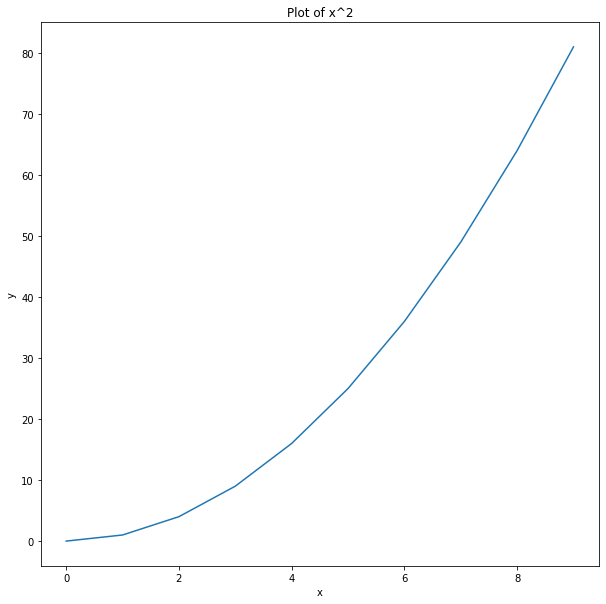

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of x^2")

plt.show()

It is also possible to plot multiple functions on the same axes. This can be done easily by calling .plot a second time using the same axes. An example is shown below:

In [ ]:
x_sin = lambda x: np.sin(x)
x_cos = lambda x: np.cos(x)

x = np.linspace(0,2*np.pi,100)
y_sin = x_sin(x)
y_cos = x_cos(x)


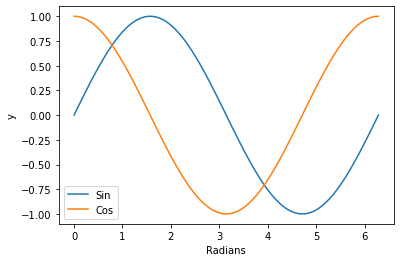

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(x,y_sin, label = 'Sin')
ax.plot(x,y_cos, label = "Cos")
ax.set_xlabel("Radians")
ax.set_ylabel("y")
ax.legend()

plt.show()

This example also shows how a legend can be added to a plot. This can be invaluable when there are multiple plots on the same axes.

### Scatter Plots
Scatter plots are similar to plots, but they don't draw a line between samples. We will plot the two side by side below:

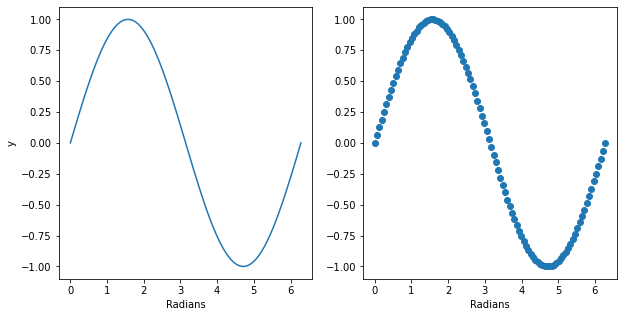

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.plot(x,y_sin)
ax2.scatter(x,y_sin)
ax1.set_xlabel("Radians")
ax2.set_xlabel("Radians")
ax1.set_ylabel("y")

plt.show()

Scatter plots are useful when viewing trends between two variables. We can demonstrate this with the Iris dataset that was introduced yesterday. First, we will import the dataset using Pandas and convert it into a Numpy array:

In [ ]:
import pandas as pd

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(iris.axes)
iris_numpy = iris.to_numpy()

[RangeIndex(start=0, stop=150, step=1), Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')]


As a reminder, this dataset contains 5 features and 150 samples. Of these 5 features, the first 4 are measurements from the flowers and the final one is a label for the type of iris it is. We will start by focusing on the first two features for all the types of flowers. See if you can see any groupings in the data.

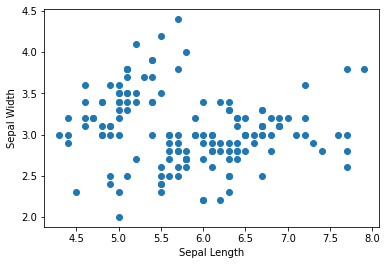

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter(iris_numpy[:,0],iris_numpy[:,1])
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
plt.show()

While it appears that there are two groups of data, it is difficult to understand their significance without using more information. We'll improve this by adding a color for each flower based on the label provided in the dataset. First, we must find what labels are used for the flowers:

In [ ]:
labels = np.unique(iris_numpy[:,-1]) # np.unique records unique values in an Array
print(labels)

['setosa' 'versicolor' 'virginica']


Next, we must replace the string labels with the colors that can be used in Matplotlib. We will use red, blue, and yellow for the three classes. We will create a new array to store these colors.

In [ ]:
# Determine the integers needed to replace the string labels
colors = np.arange(len(labels))
colors = ['red','blue','yellow']
print(colors)

# Create a new array to store the integer labels
iris_colors = np.zeros(shape = iris_numpy.shape[0], dtype = str)
print(iris_colors.shape)

['red', 'blue', 'yellow']
(150,)


Now we must find a way to add in the integer labels to the correct indices in the new array so that they correctly correspond to the flowers in the dataset. We will use some fancy slicing to do this. 

In Numpy, it is possible to select indices based on if a conditional is true. We will use the conditional "Is the string label equal to the label we are looking for", and if it is true that indice will be set to the correct number.

We will do this for all three values by using a for loop.

This will make more sense with the example below.

In [ ]:
for i in range(len(labels)):
  conditional_statement = iris_numpy[:,-1] == labels[i]
  iris_colors[conditional_statement] = colors[i]
print(iris_colors)

['r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'y' 'y' 'y' 'y' 'y' 'y']


The for loop iterates over each possible label. For each label, the conditional statement determines which indices match that label. Finally, the correct integer label is added at those indices in the new array.

Now that we have the integer labels that we need to set the colors in Matplotlib, lets try plotting the same scatter plot as before but with the new information added.

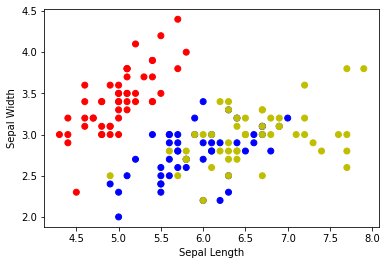

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter(iris_numpy[:,0],iris_numpy[:,1],c = iris_colors)
# ax.scatter(iris_numpy[:,0],iris_numpy[:,1],c = 'r')

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
plt.show()

Now it is easier to see how haw the values relate to each other for each flower. One of the three is clearly distinguishable from the other two, while those other two could not easily be determined from this information. 

The final improvement we can make to this plot is to add a legend so we know what each color represents. Unfortunatly, it is not possible to add different labels in the same call to ax.scatter. Instead, you must call it once for each label.



### Exercise
Implement the above plot but with labels for the three flowers. You will need to determine the best way to plot each class separetly, then call ax.scatter for each one, assigning the correct label. Make sure to add the legend to the axes.

#### Solution

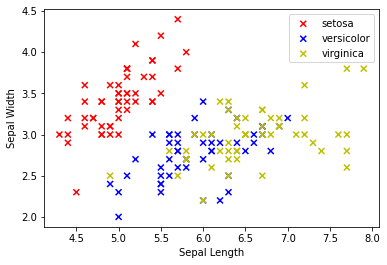

In [ ]:
# Solution 1

fig, ax = plt.subplots(1)

for i in range(len(labels)):
  conditional_statement = iris_numpy[:,-1] == labels[i]
  ax.scatter(iris_numpy[conditional_statement,0],iris_numpy[conditional_statement,1],c = iris_colors[conditional_statement],label = labels[i],marker = "x")

# ax.scatter(iris_numpy[:,0],iris_numpy[:,1],c = iris_colors)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.legend()
plt.show()

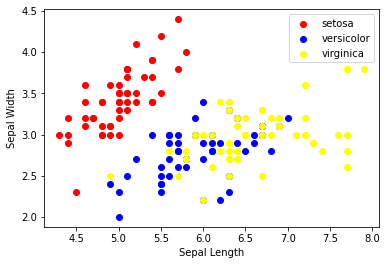

In [ ]:
# Solution 2
setosa = iris_numpy[iris_numpy[:,-1] == labels[0]]
versicolor = iris_numpy[iris_numpy[:,-1] == labels[1]]
virginica = iris_numpy[iris_numpy[:,-1] == labels[2]]

fig, ax = plt.subplots(1)
ax.scatter(setosa[:,0],setosa[:,1],c = colors[0], label = labels[0])
ax.scatter(versicolor[:,0],versicolor[:,1],c = colors[1], label = labels[1])
ax.scatter(virginica[:,0],virginica[:,1],c = colors[2], label = labels[2])
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.legend()
plt.show()

### Histograms
Histograms are useful plot in statistics, where they are used to view the distribution of a feature. The split a continues range into "bins", then count how many samples fit into that bin.

We will use a histogram to view the distribution of petal lengths for the setosa flower. We will start by allowing Matplotlib to automatically determine the number and size of the bins the petal lengths are split into.

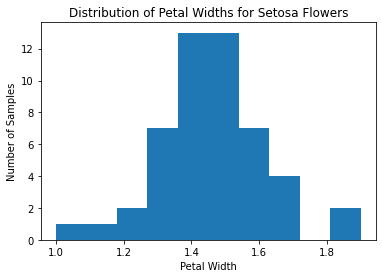

In [ ]:
setosa_data = iris_numpy[iris_numpy[:,-1] == labels[0]]

fig, ax = plt.subplots(1)
ax.hist(setosa_data[:,2]) # Rwidth is used to set the size of the bar inside it's category. We use a value of .9 so it is easier to see the different categories.
ax.set_xlabel("Petal Width")
ax.set_ylabel("Number of Samples")
ax.set_title("Distribution of Petal Widths for Setosa Flowers")
plt.show()

From the plot, you can see that Matplotlib split the lengths into 10 bins, which cover a range of approximatly .1 cm. The plot shows that for the Setosa flowers, most specimins have petals that are between 1.3 and 1.6 cm long. 

Lets plot this same data again, but with double the amount of bins.

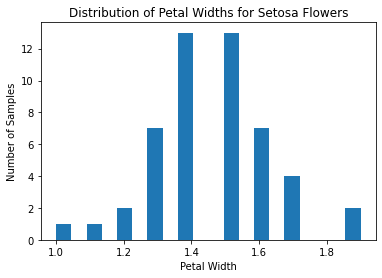

In [ ]:
fig, ax = plt.subplots(1)
ax.hist(setosa_data[:,2],20) 
ax.set_xlabel("Petal Width")
ax.set_ylabel("Number of Samples")
ax.set_title("Distribution of Petal Widths for Setosa Flowers")
plt.show()

There are now gaps between the samples where there are no measured examples, and the bins are now cover a range of approximatly .05 cm.

### Box Plots
To continue with the statistics based plots, we will take a look at box plots and how they provide a unique method for viewing the distribution of data. Box plots are used to visualize the spread of data using standardized method.

Instead of attempting to explain the boxplot here, I ask that you look through the following article, which provides an in depth explanation of how they are created: [Box Plot Article](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

With that explaination, let us explore how we can use boxplots to easily visualize data about one or more samples.

This first example focus only on the data for the Setosa flower. The box plot for each of it's features is plotted below:

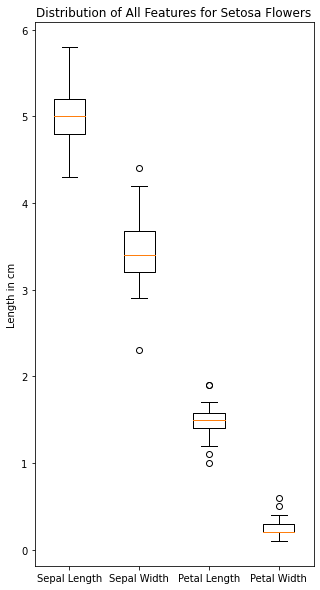

In [ ]:
fig, ax = plt.subplots(1,figsize = (5,10))
ax.boxplot(setosa_data[:,:-1])
ax.set_xticklabels(("Sepal Length","Sepal Width","Petal Length","Petal Width"))
ax.set_ylabel("Length in cm")
ax.set_title("Distribution of All Features for Setosa Flowers")
plt.show()

The above plot can be used to learn some interesting information about the Setosa Flower. For instance, you can see how the Sepal Length has a much wider spread then the Petal Width, or that the Petal Width is much smaller then the other features. 

While this information is interesting, you can get even more by plotting the box plots of each type of flower against each other.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


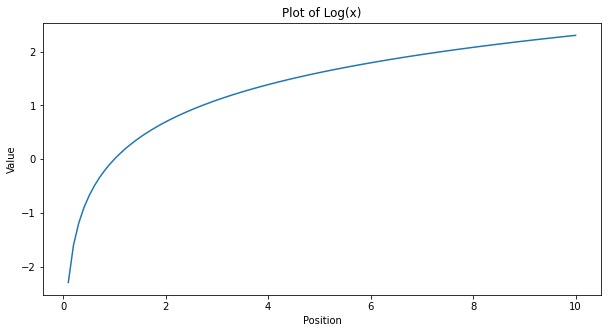

In [ ]:
x = np.linspace(0,10,100)
log_funct = lambda x : np.log(x)
y = log_funct(x)

fig, ax = plt.subplots(1,figsize = (10,5))
ax.plot(x,y)
ax.set_xlabel("Position")
ax.set_ylabel("Value")
ax.set_title("Plot of Log(x)")

plt.show()

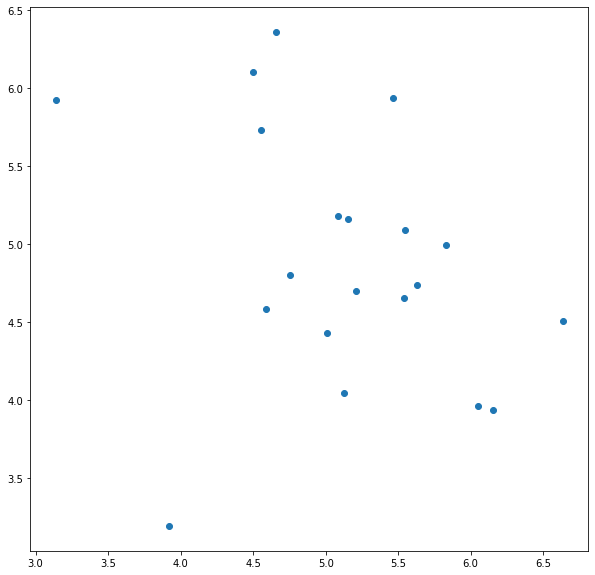

In [ ]:
x = np.random.normal(5,1,size = (20,2))

fig, ax = plt.subplots(1,figsize=(10,10))
ax.scatter(x[:,0],x[:,1])
plt.show()

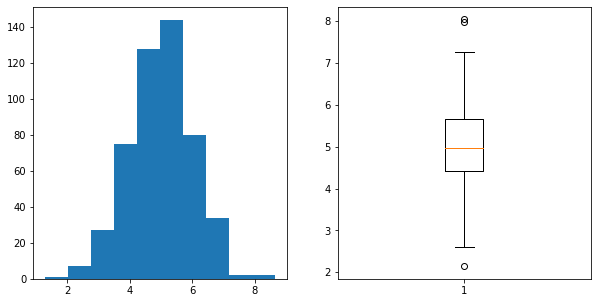

In [ ]:
x = np.random.normal(5,1,size = (500,2))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(x[:,0])
ax2.boxplot(x[:,1])

plt.show()

### Exercise
Plot the box plots for the Petal Length of each flower against each other. Look and see what trends you can see from the figure. In order to plot the three sets of data, create a list containing all three: 


```
all_data = [setosa_data,versicolor_data,virginica_data]
```
Then insert that into ax.boxplot.


#### Solution

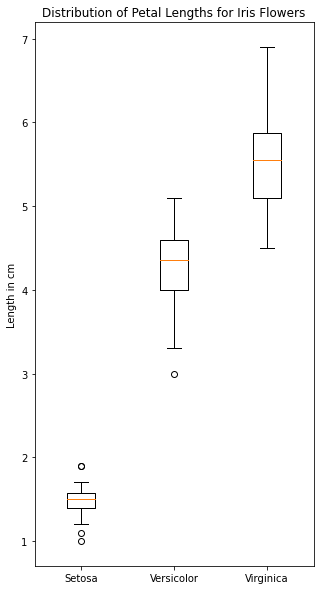

In [ ]:
# Solution
setosa_petal_length = iris_numpy[iris_numpy[:,-1] == labels[0]][:,2]
versicolor_petal_length = iris_numpy[iris_numpy[:,-1] == labels[1]][:,2]
virginica_petal_length = iris_numpy[iris_numpy[:,-1] == labels[2]][:,2]

all_data = [setosa_petal_length,versicolor_petal_length,virginica_petal_length]

fig, ax = plt.subplots(1,figsize = (5,10))
ax.boxplot(all_data)
ax.set_xticklabels(("Setosa","Versicolor","Virginica"))
ax.set_ylabel("Length in cm")
ax.set_title("Distribution of Petal Lengths for Iris Flowers")
plt.show()

### Contour Plots
The final type of plot we will go over is the Contour plot, which can be used to visualize a 2d distribution. We saw an example of this yesterday with the Scipy interpolation example. In this section, we will learn how to actually implement these plots.

We will switch from the Iris dataset to the same function that was used in yesterday's example. As a reminder, this function will take in an array of coordinates with the shape $[N,2]$, where N is the number of coordinates. This function is designed for the unit square, so make sure to only provide coordinates where x and y are bounded by $[0,1]$. This function is provided below:

In [ ]:
def function(pos):

  if isinstance(pos,list):
    pos = np.array(pos)
    pos = np.expand_dims(pos,axis=0)

  scalar = 1
  x_trans = 0
  y_trans = 0
  term1 = 0.75 * np.exp(-np.power(9*scalar*pos[:,0]-2+x_trans,2)/4 - np.power(9*scalar*pos[:,1]-2+y_trans,2)/4);
  term2 = 0.75 * np.exp(-np.power(9*scalar*pos[:,0]+1+x_trans,2)/49 - (9*scalar*pos[:,1]+1+y_trans)/10);
  term3 = 0.5 * np.exp(-np.power(9*scalar*pos[:,0]-7+x_trans,2)/4 - np.power(9*scalar*pos[:,1]-3+y_trans,2)/4);
  term4 = -0.2 * np.exp(-np.power(9*scalar*pos[:,0]-4+x_trans,2) - np.power(9*scalar*pos[:,1]-7+y_trans,2));
  return -(term1+term2+term3+term4)

Below is an example of using the function with 20 randomly generated coordinates.

In [ ]:
coordinates = np.random.uniform(0,1, size = (20,2))
values = function(coordinates)

ax.contour has some unique requirements in order to properly function. The function takes in three inputs, labeled X, Y and Z. X and Y represent the coordinates, and Z the value of the function at those coordinates. The difficult part is that each input must have 2 axes (be 2d). Lets try visualizing the inputs using ax.scatter. 

We will use the function np.meshgrid to create the X and Y arrays. Meshgrid is specifically designed for creating this type of input.

The first step is to determine where we want to sample the function for each dimension.

In [ ]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,10)

print(x.shape)
print(y.shape)

(20,)
(10,)


Using these values, we will sample 20 different points along the x axis and 10 on the y axis. This will create a grid of $20 x 10$ samples, or 200 samples total. We will use meshgrid to create the X and Y input for this grid:

In [ ]:
X,Y = np.meshgrid(x,y)
print(X.shape)
print(Y.shape)
print(X.size)
print(Y.size)

(10, 20)
(10, 20)
200
200


Now lets plot these using ax.scatter to visualize how the grid looks:

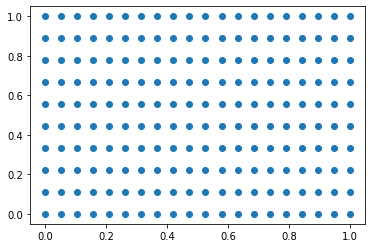

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter(X,Y)
plt.show()

Now that we have created the correct input, we can input these into the function and record the values it returns at each coordinate into the Z array. As mentioned before, the Z array is expected to have the same size as the X and Y arrays.

We will utilize some for loops to go over each coordinate.

In [ ]:
Z = np.empty(X.shape)
print(Z.shape)

(10, 20)


In [ ]:
for i in range(X.shape[0]): # Index through the row
  for j in range(X.shape[1]): # Index through the column
    Z[i,j] = function([X[i,j],Y[i,j]]) 

We now have the proper inputs to plot the contour of the data.

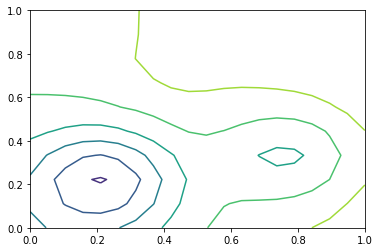

In [ ]:
fig, ax = plt.subplots(1)
ax.contour(X,Y,Z)
plt.show()

A couple things to note about this contour plot:
1.   We didn't use many samples to generate it, resulting in the contours being jagged and not matching the funciton perfectly.
2.   Matplotlib only used 7 contour lines to create the plot, leaving large patches of white area where the regions don't have a large change in value.

Lets try and improve this plot by adding contour lines.

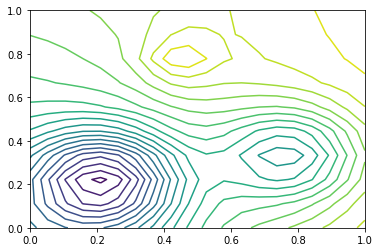

In [ ]:
fig, ax = plt.subplots(1)
ax.contour(X,Y,Z,levels = 20)
plt.show()

This gives a much clearer view of the function, but it also clearly shows how more samples are needed to smooth out the contour lines.

### Exercise
Recreate the contour with more samples. Take notes on how its changes the plot. You can also try reducing the number of samples more and see how it changes the plot.

#### Solution

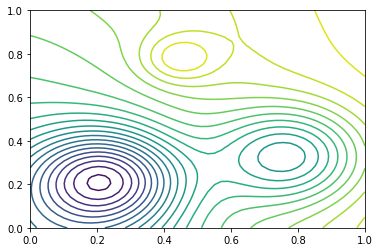

In [ ]:
# Solution
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
X,Y = np.meshgrid(x,y)
Z = np.empty(X.shape)

for i in range(X.shape[0]): # Index through the row
  for j in range(X.shape[1]): # Index through the column
    Z[i,j] = function([X[i,j],Y[i,j]]) 

fig, ax = plt.subplots(1)
ax.contour(X,Y,Z,levels = 20)
plt.show()

### Final Notes on Contour Plots

One final note about contour plots. The type of input we created for the contour plot, which are evenly spaced in a grid, is called structured data, more specifically a structured mesh. 

In yesterday's example, we used random samples from the same function in order to interpolate the funciton. These are called unstructured data, or a unstructured mesh. 

As discussed, the Matplotlib contour plot cannot take an unstructured mesh as input, so how were we able to visualize the function based on the unstructured mesh?

This was done by first creating the interpolated function, then sampling the interpolated function with a structured mesh. This is an important concept to remember when you utilizing contour plots for real world data, which will almost always be unstructured. I have copied the plotting function I provided yesterday below so you can see how this is done. I have added some comments to help follow the different steps.

In [ ]:
def plot_original_vs_interpolated_functions(function, interpolation, bounds =  [[None,None],[None,None]], samples = None):
  # Function: This is the actual function the samples are taken from
  # interpolation: This is the interpolated function created from the unstructured data
  n = 100

  for bound in bounds:
    if bound[0] is None: bound[0] = -10
    if bound[1] is None: bound[1] = 10
# In my implementation, I don't use meshgrid to create the 2D X and Y arrays. 
# Instead, I create 1D arrays using linspace and leave them as (100,_) arrays.
# I did't discuss this above, but contour can take in 1d arrays for X and Y if they are strictly increasing (each value is greater then the last) 
  X = np.linspace(bounds[0][0],bounds[0][1],n) 
  Y = np.linspace(bounds[1][0],bounds[1][1],n)

# I created two arrays, one for the original function and one for the interpolated
  Z1 = np.zeros((n,n))
  Z2 = np.zeros((n,n))
  interpolated_Z = np.zeros((n,n))

# I used two for loops to fill in the two arrays, but a better implementation would be to use one.
  for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
      Z1[y_index][x_index] = function([x,y])

  for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
      Z2[y_index][x_index] = interpolation(x,y)

# When I plotted the contours, I used one that only draws contour lines and one that colors the background.
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
# This first contour plot draws 30 contour lines with no background coloring (the color makes the lines black)
# I found that 30 contour lines gave good detail to the plot but wasnt overwhelming
  cf1 = ax1.contour(X, Y, Z1, 30, linewidths=0.5, colors='k')
# This second contour fills in the contour regions with a color. Note that it actually fills in 50 contour regions instead of 30
# By filling in the colors based off more regions, the color provides more detail to the plot without making it visually confusing
  cf1 = ax1.contourf(X, Y, Z1, 50, cmap=plt.cm.rainbow)
  if samples is not None: ax1.scatter(samples[:,0],samples[:,1],marker = 'x', color = 'black')
  ax1.set_xlim(bounds[0][0],bounds[0][1])
  ax1.set_ylim(bounds[1][0],bounds[1][1])
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  ax1.set_title("Original Function with Sample Locations")

  cf2 = ax2.contour(X, Y, Z2, 30, linewidths=0.5, colors='k')
  cf2 = ax2.contourf(X, Y, Z2, 50, cmap=plt.cm.rainbow)
  if samples is not None: ax2.scatter(samples[:,0],samples[:,1],marker = 'x', color = 'black')
  ax2.set_xlim(bounds[0][0],bounds[0][1])
  ax2.set_ylim(bounds[1][0],bounds[1][1])
  ax2.set_xlabel("x")
  ax2.set_ylabel("y")
  ax2.set_title("Interpolated Function with Sample Locations")

  plt.show()

# Data Analysis Methods
As discussed, data analysis is the process of analyzing and extracting information from data. This information can then be used to draw conclusions from the data. We covered the two types of approaches to analyzing data, qualitative and quantitative analysis, and subsets of those approaches. We will focus on two of these subsets, specifically statistical analysis and predictive analysis.

## Statistical Analysis
Statistics are one of the most important tools for analyzing a dataset. They allow you to collect, analyze, interprete, and present empirical data from your dataset. Statistics will form the basis of most projects that require you to analyze data. It is important to know what tools are at your disposal in Python for gathering statistics about a data set. 

In this section, we will go over some different methods you can use to analyze geographic data. We will utilize a public dataset from Nasa that contains information about all known meterorite impacts on Earth. The dataset contains information about the time, the location, the mass, and more. A link to the dataset can be found [here](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh).

In [ ]:
meteorite_data = pd.read_csv('https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD')

In [ ]:
print(meteorite_data.shape)
print(meteorite_data.axes)

(45716, 10)
[RangeIndex(start=0, stop=45716, step=1), Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')]


### Mean, Median, Mode
We will start with some basics from statistics, the mean, median, and mode of a set of data. This information is a great first step to understanding data, as it provides the average value that can be expected. These measurements can also be used as a step for other methods, such as normalizing data.

The example below will show how Pandas can be used to easily calculate these values from a Dataframe.

In [ ]:
mean = meteorite_data['mass (g)'].mean()
median = meteorite_data['mass (g)'].median()
mode = meteorite_data['mass (g)'].mode()

print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)

Mean: 13278.078548601512
Median: 32.6
Mode: 0    1.3
dtype: float64


### Standard Deviation and Variance
The standard deviation of a dataset is the amount of dispersion the values have. The wider range of values in the dataset, the larger the standard deviation. The variance is the square of the standard deviation, and is another measure of dispersion.

In [ ]:
meteorite_std = meteorite_data['mass (g)'].std()
meteorite_var = meteorite_data['mass (g)'].var()

print("Standard Deviation", meteorite_std)
print("Variance", meteorite_var)

Standard Deviation 574988.876410473
Variance 330612207995.7782


### Distribution of Data
Important values for the distribution of a dataset can also be found. These values are the same as the ones that can be found from a boxplot. These can include measurements of the max and min values, the median of the values, and the 25\% and 75\% quantiles in the dataset.


In [ ]:
print("Min:", meteorite_data['mass (g)'].min())
print("25% Quantile:", meteorite_data['mass (g)'].quantile(.25))
print("50% Quantile:", meteorite_data['mass (g)'].quantile(.50))
print("75% Quantile:", meteorite_data['mass (g)'].quantile(.75))
print("Max:", meteorite_data['mass (g)'].max())


Min: 0.0
25% Quantile: 7.2
50% Quantile: 32.6
75% Quantile: 202.6
Max: 60000000.0


The skew of a dataset measures the distortion of the distribution of a dataset from the bell curve. In a bell curve, the distribution of values above and below the mean is symmetrical, while in many real-world datasets this isnt the case. 

In [ ]:
skew = meteorite_data['mass (g)'].skew()
print("Skewness:",skew)

Skewness: 76.91011731918955


Pandas also provides a function to calculate an array of information about a Dataframe and a second method for providing a list of statistics to collect:

In [ ]:
meteorite_description = meteorite_data['mass (g)'].describe()
print(meteorite_description)

aggregate_info = meteorite_data['mass (g)'].agg(["min", "max", "median", "skew"])
print(aggregate_info)

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64
min       0.000000e+00
max       6.000000e+07
median    3.260000e+01
skew      7.691012e+01
Name: mass (g), dtype: float64


Lets try using Pandas to plot the box plots of the data so we can visually see the above information.

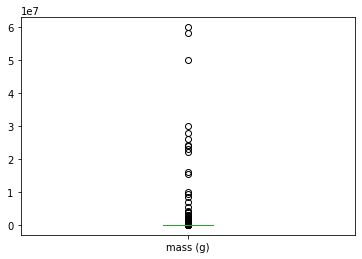

In [ ]:
meteorite_data['mass (g)'].plot.box()

It seems the data has far too high of a spread to be plotting using box plots. You can also see that this is the case by looking at the quartiles above. 75\% of the data is below 202 grams, while the maximum value is 60000000 grams. This is a massive range, so it is not suprising that it will not be easily plotted.

Lets try plotting the data as a histogram instead to see the distribution.

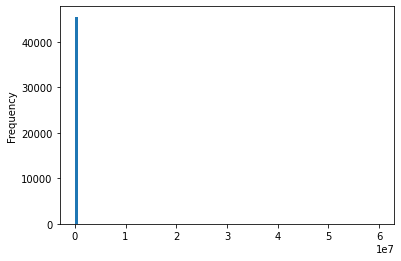

In [ ]:
meteorite_data['mass (g)'].plot.hist(bins = 100)

The histogram shows that the vast majority of our data lies in a small range with some extreme outliers that skew the data toward higher values. We can try solving this by removing there outliers from the dataset. Removing outliers is a common method when pre-processing data. Below is an example of an implementation to remove outliers, but the concept will be covered in more detail in tomorrows lesson.

In [ ]:
# Find the value of Q1 and Q3
meteorite_description = meteorite_data['mass (g)'].describe()
print(meteorite_description,'\n')
# Calculate the inter-quartile range of the dataset
IQR = meteorite_description["75%"] - meteorite_description["25%"]
# Calculate the upper and lower limit of the data
upper_limit = meteorite_description["75%"] + (1.5*IQR)
lower_limit = meteorite_description["25%"] - (1.5*IQR)

# Create a mask for all data between these values
mask = (meteorite_data['mass (g)'] < upper_limit) & (meteorite_data['mass (g)']> lower_limit)
# Apply the mask to the data to remove outliers
processed_meteorite_data = meteorite_data.loc[mask]
print(processed_meteorite_data['mass (g)'].describe())

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64 

count    38499.000000
mean        68.131047
std        103.347342
min          0.000000
25%          5.510000
50%         20.392000
75%         81.300000
max        495.400000
Name: mass (g), dtype: float64


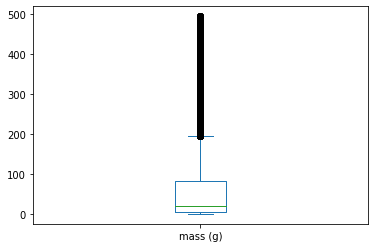

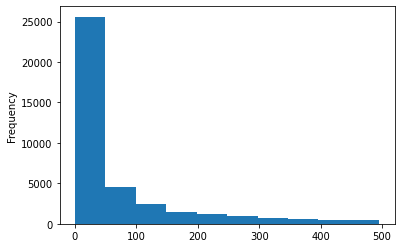

In [ ]:
processed_meteorite_data['mass (g)'].plot.box()
plt.show()
processed_meteorite_data['mass (g)'].plot.hist()

These plots are much easier to read then the previous two. We can now see that our data has a non-normal distribution, leading to a large number of outliers above the mean of the data. This is called a right-skewed distribution.

### Counting Values
It can be useful to record how many of each unique value is in the dataset. Lets look at how many of each year is present in the meteorite dataset:

In [ ]:
# We first count the number of samples for each year
years_count = meteorite_data['year'].value_counts()
# the values.count function sorts the values by their count, so we resort by year.
years_sorted = years_count.sort_index()
print(years_sorted.shape)
print(years_sorted)

(265,)
860.0        1
920.0        1
1399.0       1
1490.0       1
1491.0       1
          ... 
2010.0    1005
2011.0     713
2012.0     234
2013.0      11
2101.0       1
Name: year, Length: 265, dtype: int64


According to Pandas, there are 265 different years where a meteorite was recorded falling. Lets plot a bar graph of these counts and look at the distribution.

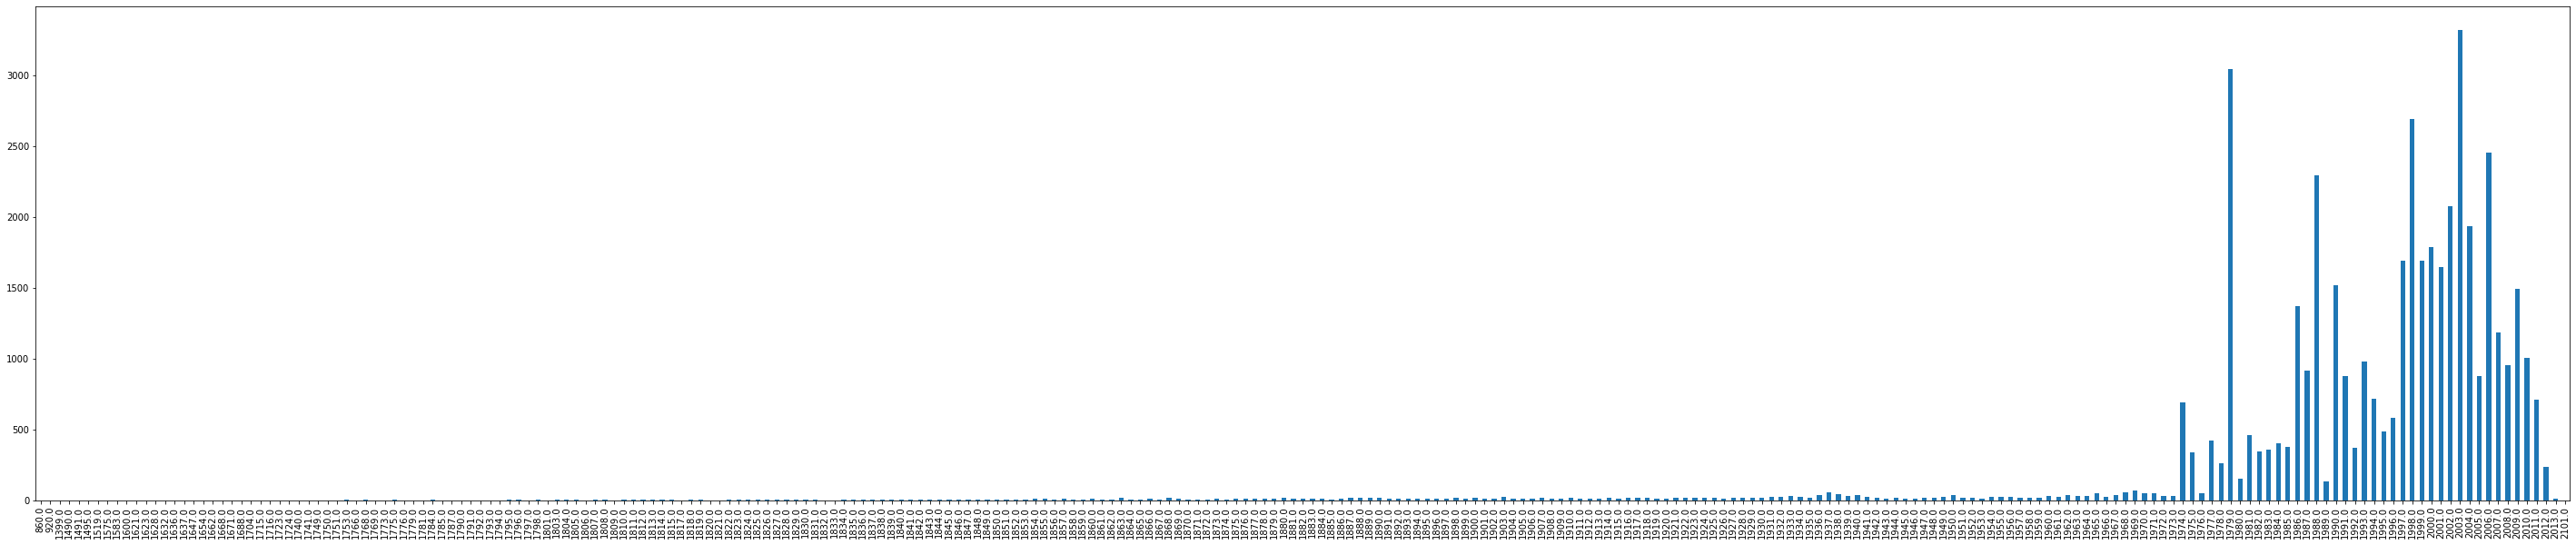

In [ ]:
years_sorted.plot.bar(figsize = (50,10))

Once again it appears that Pandas has trouble plotting the data due to the large spread of values. From the plot, it can be seen that we are sorting from the year 860 to 2101.

Lets try correcting this by limiting the years that we are looking at. The maximum year that the dataset can contain is the current year 2022, it is obvious that the year 2101 is an error. The minimum year is more difficult to determine. It is clear that there is little data before the year 1974. We could determine this as the cutoff year and focus on the dates with the majority of data, or we could select an earlier year in order to capture the outliers. Lets try both methods and see the results.

In [ ]:
max_year = 2022
min_year_1 = 1974
min_year_2 = 1873

mask1 = (meteorite_data['year']>min_year_1) & (meteorite_data['year']<max_year)
mask2 = (meteorite_data['year']>min_year_2) & (meteorite_data['year']<max_year)

years_trimmed_1 = meteorite_data.loc[mask1]
years_trimmed_2 = meteorite_data.loc[mask2]



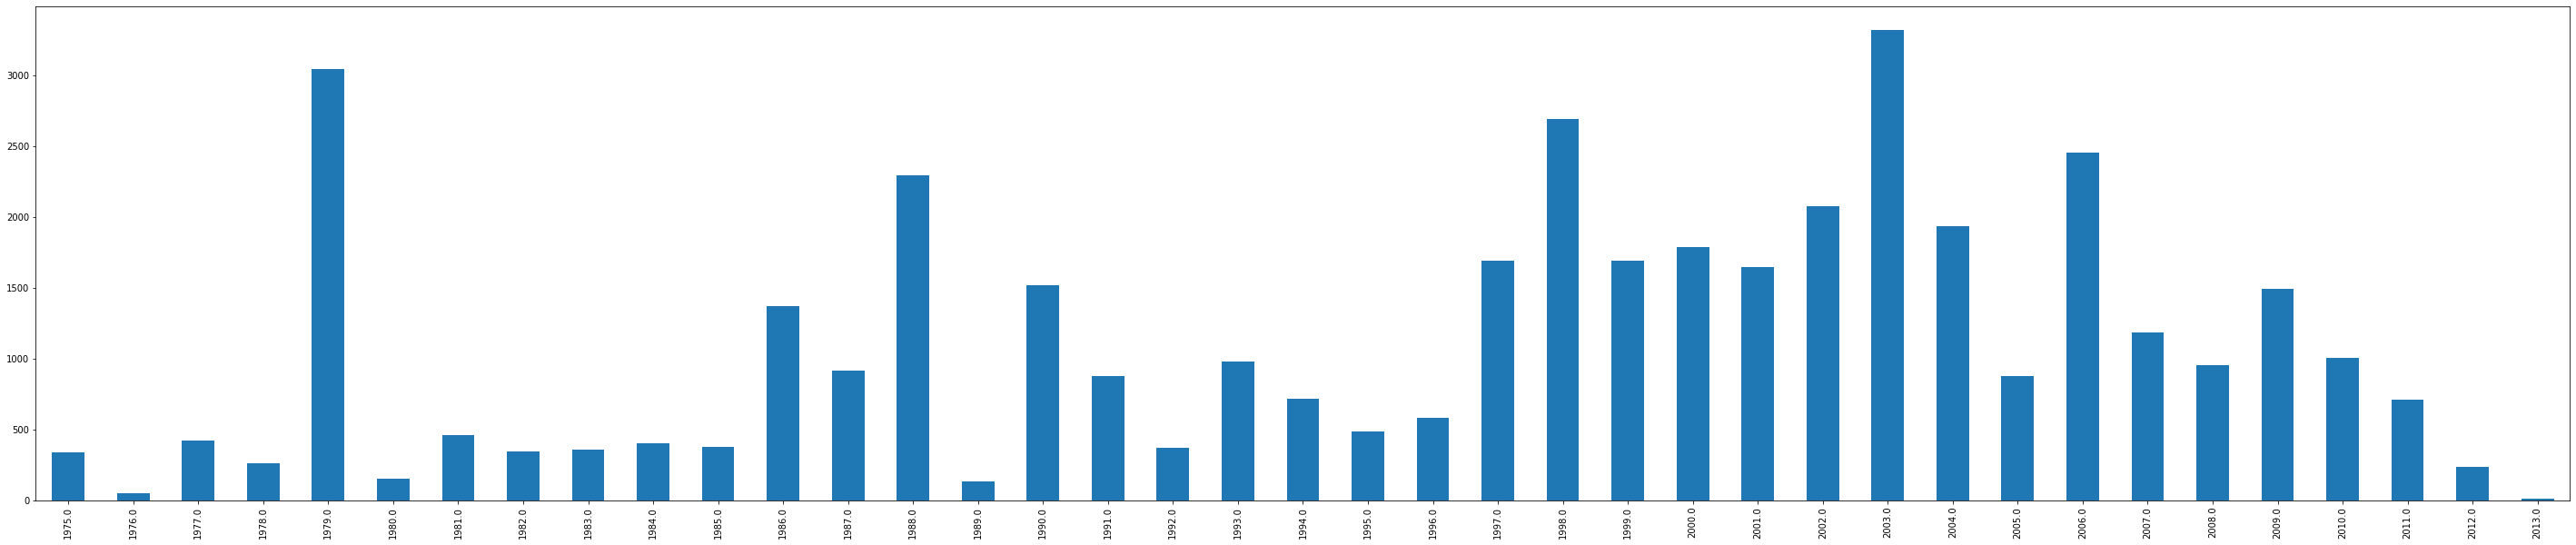

In [ ]:
years_count = years_trimmed_1['year'].value_counts()
years_sorted = years_count.sort_index()
years_sorted.plot.bar(figsize = (50,10))

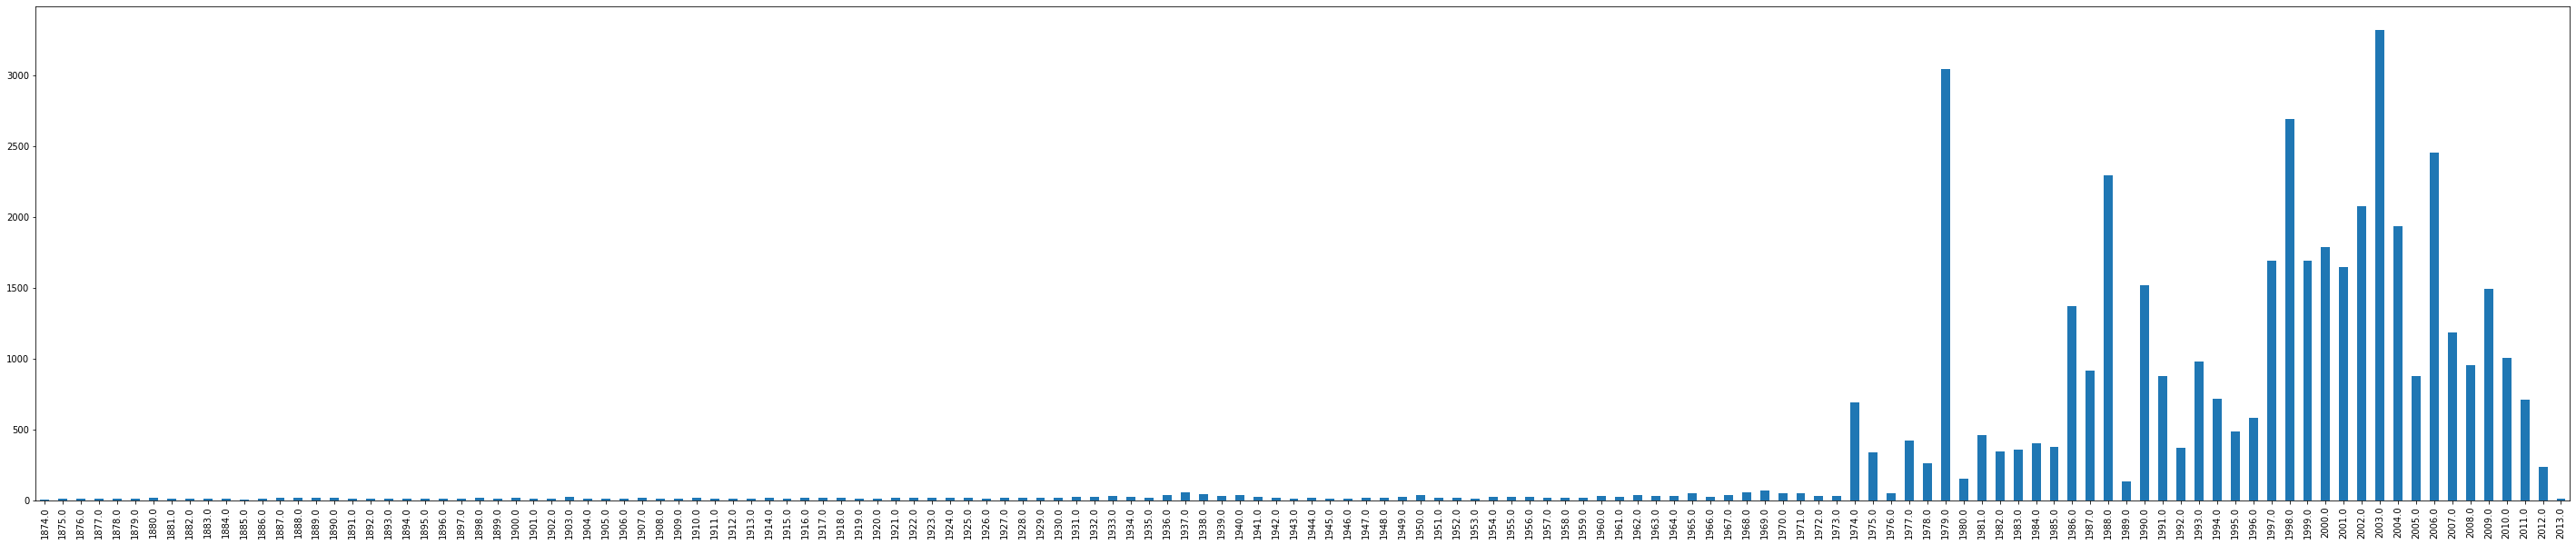

In [ ]:
years_count = years_trimmed_2['year'].value_counts()
# the values.count function sorts the values by their count, so we resort by year.
years_sorted = years_count.sort_index()
years_sorted.plot.bar(figsize = (50,10))

It is important to note that which of these methods to select is dependent on what the data is being used for. For instance, if you are trying to analyze trends in how often meteorites are falling into the atmosphere, it may be beneficial to only analyze data after 1974 where there is clearly much more data being recorded and it could be argued to be more accurate. On the other hand, if you want to analyze how often meteorites of a certain size enter the atmosphere, it may be better to not remove any outliers or data so that you can have the largest sample size possible, and therefore more accurate statistics.

## Predictive Analysis
Preditive analysis is used to predict future values based on current data. By looking at trends in previous data, you can estimate what future values will be. Predictive analysis is closly related to statistical analysis, which is used to analyze trends in a dataset. We will continue to focus on the meteorite dataset and attempt to predict the mass of future meteorites.

First off, let us trim the dataset to reduce the amount of data we are working with. We will look at data that is recorded after the 1974 data, as it can be argued that data before this data is inaccurate and only roughly estimates the mass.

In [ ]:
max_year = 2022
min_year = 1974
mask = (meteorite_data['year']>min_year) & (meteorite_data['year']<max_year)
trimmed_data = meteorite_data.loc[mask]

Let us analyze the distribution of masses in this time frame using a histogram. We will first convert the data to kilograms by dividing each value by 1000. We will then plot the histogram with a logarithmic scale for the count. Logarithmic scales are a good option for data where some values are multiple orders of magnitude above others, such as this dataset. We also plot the histogram using the Density=True parameter, which normalizes the values in the histogram so that they sum to 1.

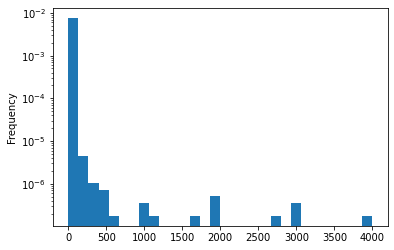

In [ ]:
trimmed_data_kg = trimmed_data.loc[:,'mass (g)'].div(1000)
trimmed_data_kg.plot.hist(bins=30,log = True,density=True)

You can see the right-skewed distribution in the data that was seen in the previous section. In order to predict values based on the data, we will need to create a distribution that estimates values from this dataset.

We will start with the most common distribution, the Gaussian distribution. Lets see if we can fit the Gaussian distribution to this data. We will use Scipy to create our distribution. Please note that the Gaussian distribution is commonly called the Normal distribution, which is the name used in Scipy. We will also convert the Pandas Dataframe to a Numpy array to help with plotting the values.

In [ ]:
from scipy import stats

meteorite_mass = trimmed_data_kg.to_numpy()

meteorite_mass_mask = np.isfinite(meteorite_mass) # The dataset has some values that are not finite and need to be removed
meteorite_mass = meteorite_mass[meteorite_mass_mask]

Below is a plot of the standard normal distribution.

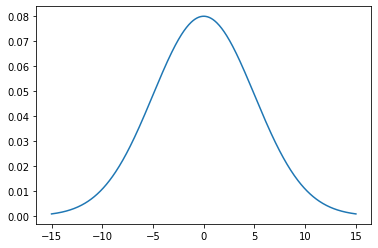

In [ ]:
normal_dist = stats.norm(0,5)

x = np.linspace(-15,15,500)
fig,ax = plt.subplots(1)
ax.plot(x, normal_dist.pdf(x))
plt.show()

We have two variables that we can modify to adjust the distribution, the mean (loc) and the standard deviation (scale). Lets try recording these values from our data and using them to create our distribution.

In [ ]:
mass_description = trimmed_data_kg.describe()
mean = mass_description['mean']
std = mass_description['std']
print("Mean:",mean)
print("Standard deviation:",std)

Mean: 1.3770310175521712
Standard deviation: 38.554224989308764


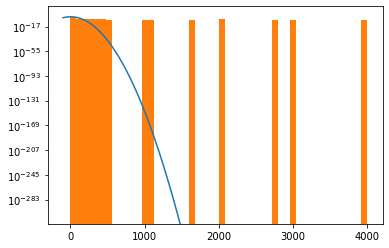

In [ ]:
normal_dist = stats.norm(loc = mean, scale = std)
x = np.linspace(-100,4000,500)
y = normal_dist.pdf(x)

fig,ax = plt.subplots(1)
ax.plot(x, y)
ax.hist(meteorite_mass,bins=50, density=True)
ax.semilogy()
plt.show()

It is clear that the Normal distribution is not accuratly mapping the distribution using these parameters. Lets see if Scipy's .fit function can find better parameters for the function.

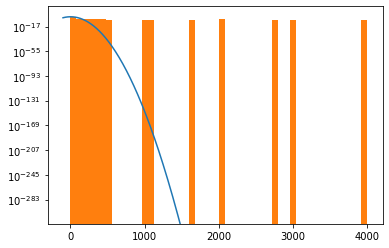

In [ ]:
params = stats.norm.fit(meteorite_mass)
x = np.linspace(-100,4000,500)
y = stats.norm.pdf(x,loc = params[0],scale=params[1])

fig,ax = plt.subplots(1)
ax.plot(x, y)
ax.hist(meteorite_mass,bins=50, density=True)
ax.semilogy()
plt.show()

As suspected, this distribution is not normal. Lets move on to a different distribution, the alpha distribution. The alpha distribution is non-normal and skewed to the side. Below is an example of this distribution:

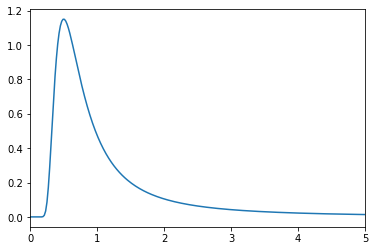

In [ ]:
alpha_dist = stats.alpha(1)

x = np.linspace(-5,5,500)
fig,ax = plt.subplots(1)
ax.plot(x, alpha_dist.pdf(x))
ax.set_xlim(0,5)
plt.show()

This looks like it could work. Lets see how Scipy does matching it to the meteorite mass data.

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


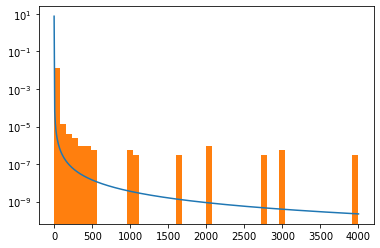

In [ ]:
params = stats.alpha.fit(meteorite_mass)
x = np.linspace(0,4000,500)
y = stats.alpha.pdf(x,*params)

fig,ax = plt.subplots(1)
ax.plot(x, y)
ax.hist(meteorite_mass,bins=50, density=True)
ax.semilogy()
plt.show()

### Exercise
Try matching some of the following distributions to the data based on the examples above. See which provides the best results for the meteorite dataset.


1. weibull_min
2. chi2
3. lognorm
4. powerlognorm




#### Solution

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


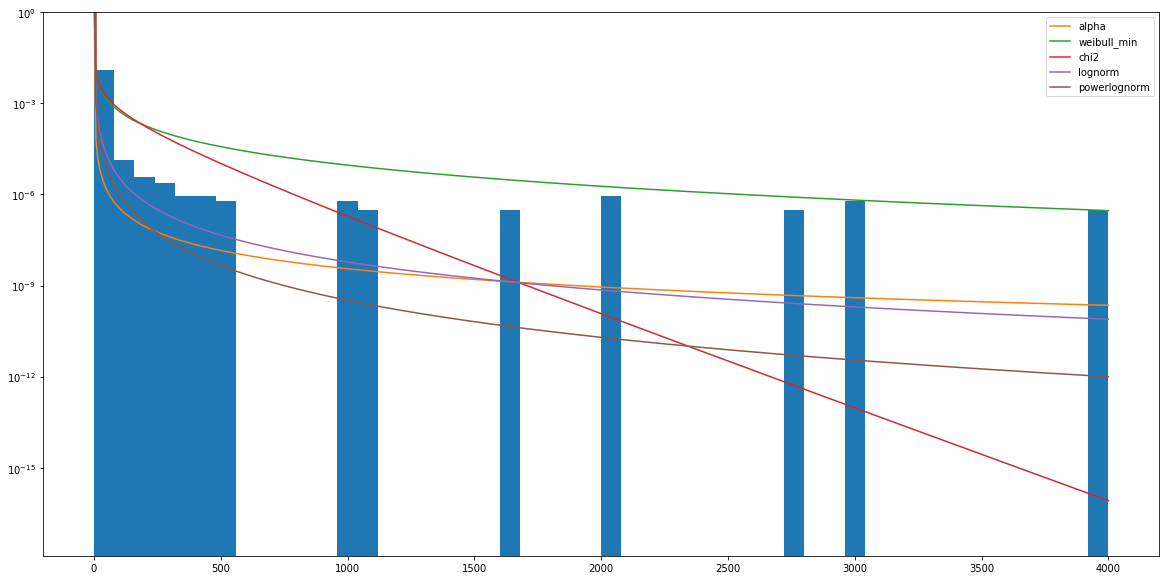

In [ ]:
#Solution
x = np.linspace(0,4000,500)
fig,ax = plt.subplots(1,figsize = (20,10))
ax.hist(meteorite_mass,bins=50, density=True)

dist_names = ['alpha', 'weibull_min', 'chi2', 'lognorm', 'powerlognorm']

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(meteorite_mass)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    ax.plot(x,pdf_fitted, label=dist_name)

ax.semilogy()
ax.set_ylim(None,1)
plt.legend(loc='upper right')
plt.show()

### Comparing Data to Estimation

So why are we matching a distribution to the dataset? How does this help us predict the mass of a meteorite? 

The distibution represents the possible values that a random variable (the mass of the meteorite) can be, and how often each value occurs. If you take a random sample from the distribution, then you are estimating the mass of a meteorite. Lets sample the Alpha and Weibull distributions and plot their histogram against the one from the actual data:

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


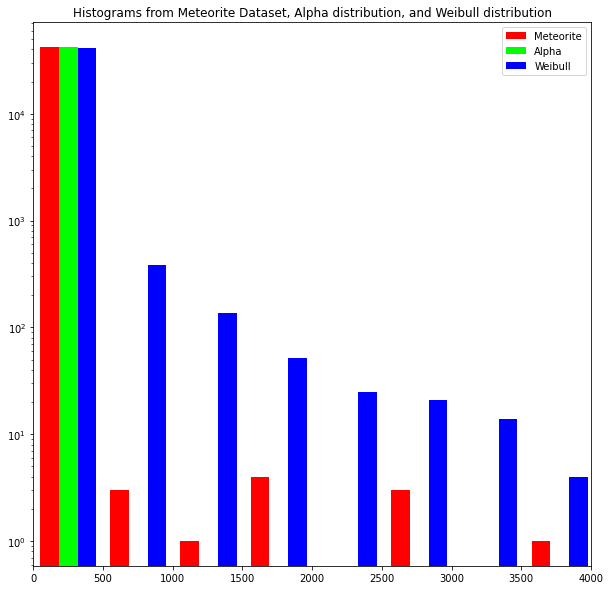

In [ ]:
params = stats.alpha.fit(meteorite_mass)
alpha_dist = stats.alpha(*params)
samples1 = alpha_dist.rvs(meteorite_mass.shape[0])

params = stats.weibull_min.fit(meteorite_mass)
weibull_dist = stats.weibull_min(*params)
samples2 = weibull_dist.rvs(meteorite_mass.shape[0])

data = [meteorite_mass,samples1,samples2]

fig,ax = plt.subplots(1,figsize = (10,10))
colors = ['red', 'lime','blue']
ax.hist(data, 40, density=False, log = True, color=colors, label=["Meteorite","Alpha","Weibull"])
ax.legend(prop={'size': 10})
ax.set_title('Histograms from Meteorite Dataset, Alpha distribution, and Weibull distribution')
ax.set_xlim(0,4000)
plt.show()



As you can see, the two distributions attempt to generate values similarly to the dataset. From this histogram it can be seen that the Alpha distribution is likely to underestimate the weight of a meteorite. It places all the samples values at lighter weights beteen 0 and 500kg. The Weibull distribution has the opposite problem, it would be likely to overestimate the weight of a meteorite. It can be seen in the histogram that many more samples from the Weibull distribution were placed at higher weights compared to the dataset.

### Exercise
You will be working with data recorded by Nasa and provided publically online. You can find the data [here](https://cneos.jpl.nasa.gov/nhats/#). The dataset records an array of information on near earth astroids, and is provided for users to identify asteroids that will be traveling near the earth and their properties. We will focus on three of these properties, the absolute visual magnitude (h), the minimum size of the object, and the maximum size of the object.
The goal of this exercise is to analyze some statistics pertaining to these values and the relationship between the average size of an asteroid and its absolute visual magnitude.

In [ ]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
from scipy import interpolate,stats

In [ ]:
url = "https://ssd-api.jpl.nasa.gov/nhats.api"
response = urlopen(url)
data_json = json.loads(response.read())
data = pd.DataFrame(data_json["data"])[['h','min_size','max_size']].astype(float)
del data_json

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   h         4337 non-null   float64
 1   min_size  4337 non-null   float64
 2   max_size  4337 non-null   float64
dtypes: float64(3)
memory usage: 101.8 KB
None


Using this data, please attempt the following:


1.   Use the min and max estimated size to estimate the size of an astroid
2.   Plot the distribution of the estimated sizes using a box plot the distribution of the absolute visual magnitude with a histogram
3.   Use Pandas to see some summary statistics on the three features
4.   Plot a scatter plot of the estimated size of the asteroid vs. the absolute visual magnitude. See if you can identify any trends between the two.
5.   Use Scipy's interpolation functions to best approximate the trend beteen the estimated size and the absolute visual magnitude.
6.   Use the normal distribution to estimate the distribution of absolute magnitudes.


#### Solution

In [ ]:
data['est_size'] = data[['min_size','max_size']].mean(axis=1)
print(data['est_size'])

0        45.50
1       221.50
2        22.65
3        57.50
4        30.00
         ...  
4332     15.90
4333     76.50
4334     41.50
4335     38.50
4336     30.50
Name: est_size, Length: 4337, dtype: float64


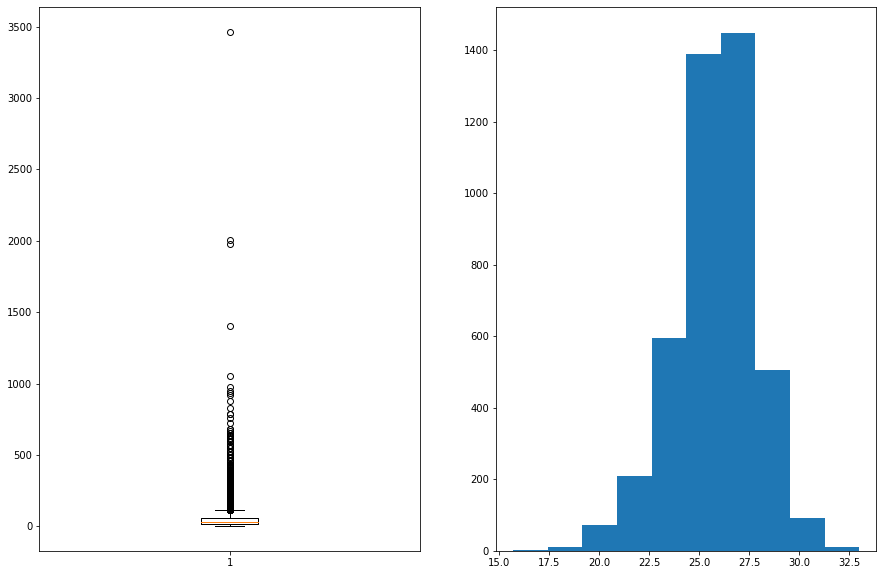

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.boxplot(data['est_size'])
ax2.hist(data['h'])
plt.show()

In [ ]:
data_description = data.describe()
print(data_description)

                 h    min_size     max_size     est_size
count  4337.000000  4337.00000  4337.000000  4337.000000
mean     25.804289    20.53976    91.883721    56.211741
std       2.042016    39.50904   176.681315   108.094911
min      15.700000     0.45000     2.000000     1.225000
25%      24.600000     6.60000    30.000000    18.300000
50%      25.900000    11.00000    51.000000    31.000000
75%      27.100000    21.00000    92.000000    56.500000
max      33.000000  1266.00000  5662.000000  3464.000000


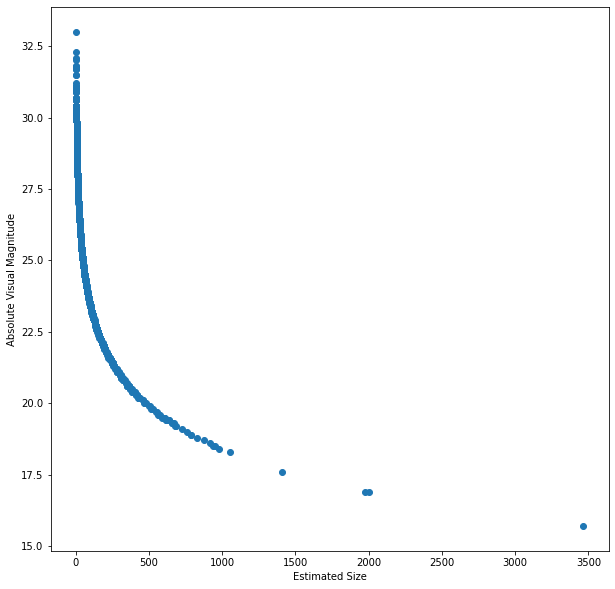

In [ ]:
fig,ax = plt.subplots(1,figsize=(10,10))
ax.scatter(data['est_size'],data['h'])
ax.set_xlabel("Estimated Size")
ax.set_ylabel("Absolute Visual Magnitude")
plt.show()

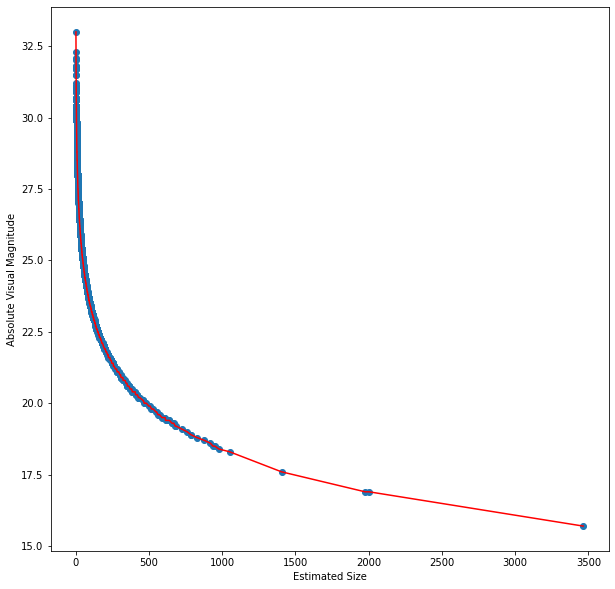

In [ ]:
interpolation = interpolate.interp1d(data['est_size'],data['h'])
fig,ax = plt.subplots(1,figsize=(10,10))
ax.scatter(data['est_size'],data['h'])
ax.plot(data['est_size'].sort_values(),interpolation(data['est_size'].sort_values()),color='r')
ax.set_xlabel("Estimated Size")
ax.set_ylabel("Absolute Visual Magnitude")
plt.show()

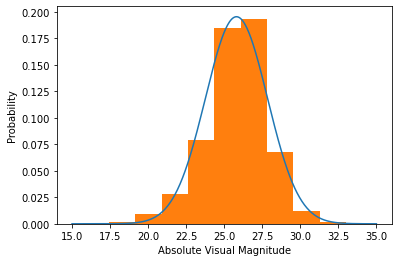

In [ ]:
params = stats.norm.fit(data['h'])
x = np.linspace(15,35,500)
y = stats.norm.pdf(x,*params)

fig,ax = plt.subplots(1)
ax.plot(x, y)
ax.hist(data['h'],bins=10, density=True)
ax.set_xlabel("Absolute Visual Magnitude")
ax.set_ylabel("Probability")
plt.show()

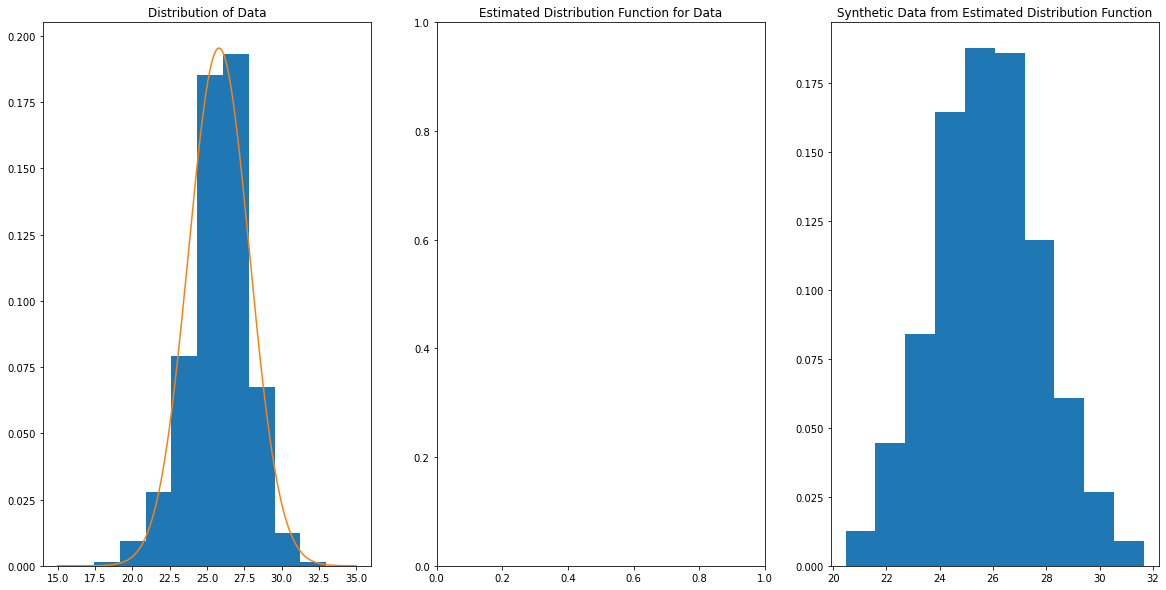

In [ ]:
params = stats.norm.fit(data['h'])
x = np.linspace(15,35,500)
y = stats.norm.pdf(x,*params)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.hist(data['h'],bins=10, density=True)
ax1.plot(x, y)
ax3.hist(stats.norm.rvs(*params,size=500),bins=10, density=True)
ax1.set_title("Distribution of Data")
ax2.set_title("Estimated Distribution Function for Data")
ax3.set_title("Synthetic Data from Estimated Distribution Function")
plt.show()